In [1]:
%matplotlib inline

from models.vae import get_vae
from tensorflow.keras.utils import HDF5Matrix
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

In [2]:
data_shape = (64, 64, 3)
vae = get_vae(data_shape, 32)
vae.load_weights('checkpoints/vae.h5')

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 31, 31, 32)   1568        encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 14, 14, 64)   32832       conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 6, 6, 128)    131200      conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (

In [7]:
def scale(a):
    return a / 255

In [8]:
start = 0
end = start + 10
x_train = HDF5Matrix('data/train.h5', 'obs', start=start, end=end, normalizer=scale)

In [9]:
predictions = vae.predict(x_train)

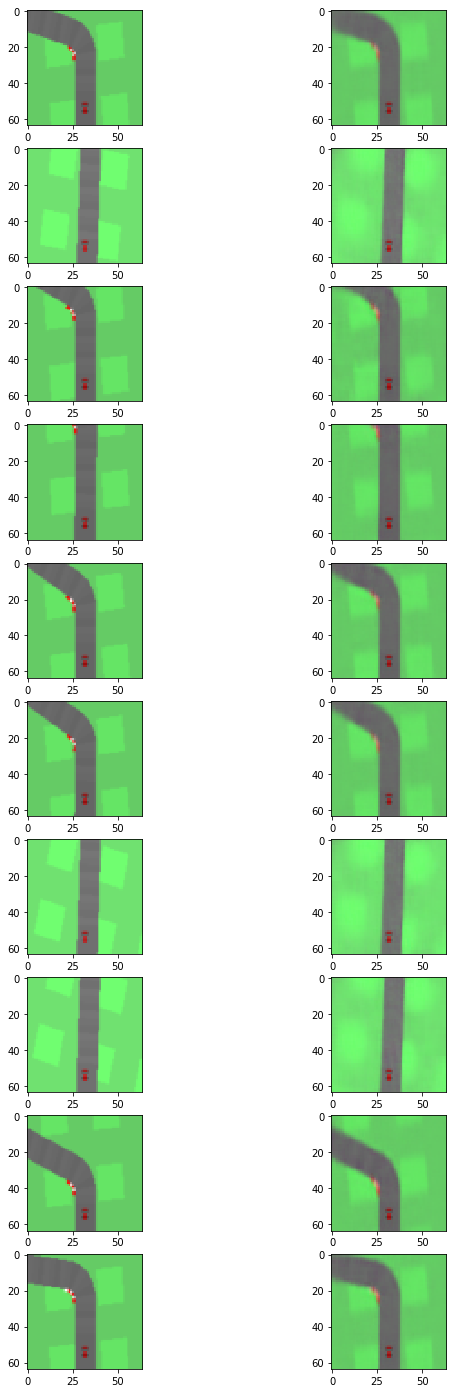

In [10]:
fig, axes = plt.subplots(10, 2, figsize=(10, 25))
for ax, im, gen in zip(axes, x_train, predictions):
    ax[0].imshow(im, interpolation='nearest')
    ax[1].imshow(gen, interpolation='nearest')

In [19]:
encoder = Model(inputs=vae.input,
                outputs=vae.get_layer('encoder').output)
out = encoder.predict(x_train)

-0.9637599 0.95000875
-0.98271596
-1.0041289 0.9551489
1.0671602
-0.92962354 0.9933929
0.89437073
-1.0043323 0.92599934
0.10448284
-0.9641637 0.9890172
-0.49404207
-0.9987198 0.91608715
-0.8047912
-1.0273954 0.9913463
-0.4123216
-0.93376625 -0.49320218
-1.213104
-1.0189282 0.95743126
0.70245236
0.9110344 1.0860016
1.1246479


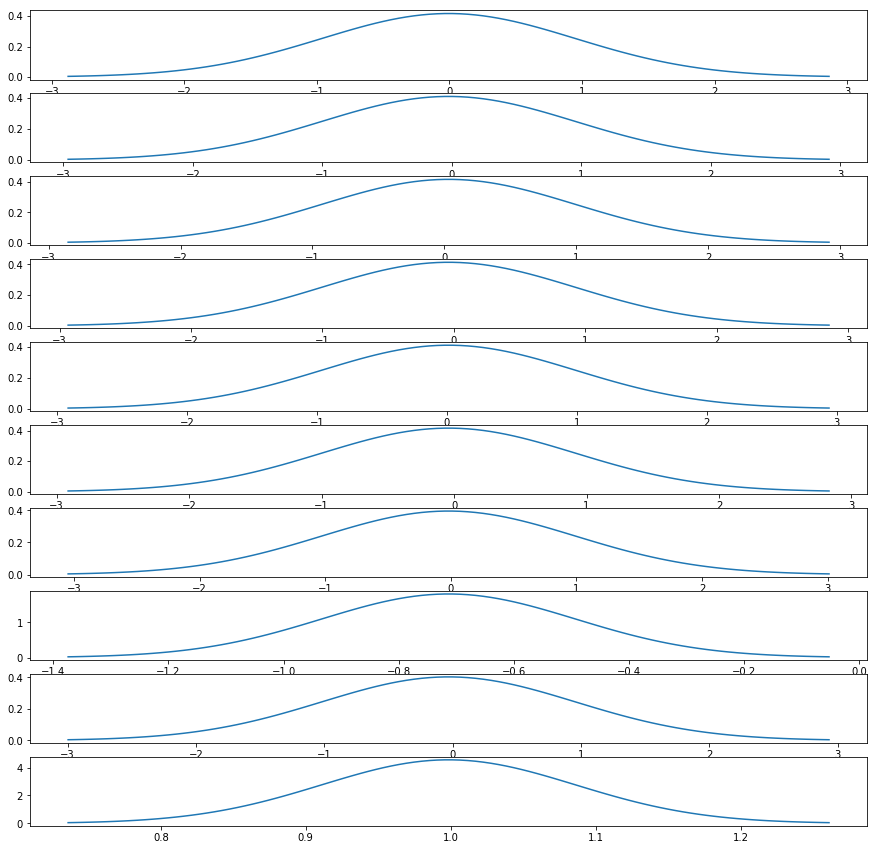

In [50]:
fig, axes = plt.subplots(10, figsize=(15, 15))
for i, ax, in enumerate(axes):
    mu = out[0][0][i]
    sigma = out[1][0][i]
    print(mu-sigma, mu + sigma)
    print(np.sum(out[2][0][i]))
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    ax.plot(x, norm.pdf(x, mu, sigma))

In [14]:
vae.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 64, 64, 3)         0         
_________________________________________________________________
encoder (Model)              [(None, 32), (None, 32),  755744    
_________________________________________________________________
decoder (Model)              (None, 64, 64, 3)         3592803   
Total params: 4,348,547
Trainable params: 4,348,547
Non-trainable params: 0
_________________________________________________________________


In [9]:
z_temp = HDF5Matrix('data/test.h5', 'z')

In [11]:
print(len(z_temp[5]))

32
